In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nodoubttome_skin_cancer9_classesisic_path = kagglehub.dataset_download('nodoubttome/skin-cancer9-classesisic')

print('Data source import complete.')


100%|██████████| 786M/786M [00:27<00:00, 29.6MB/s]

Extracting files...


Data source import complete.


# Importing libs

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
import tensorflow as tf

# List GPUs available
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

# Enable memory growth for GPUs (if available)
if gpus:
    try:
        # Enable memory growth for the first GPU
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("Memory growth enabled for the first GPU.")
    except Exception as ex:
        print(f"Error enabling memory growth: {ex}")
else:
    print("No GPU found.")


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Error enabling memory growth: 'bool' object is not callable


In [5]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim

# Check if CUDA is available and set device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [6]:
! rm -rf /kaggle/working/data/

# Reading input data

In [7]:
train_dir = os.path.join(nodoubttome_skin_cancer9_classesisic_path, "Skin cancer ISIC The International Skin Imaging Collaboration", "Train")
test_dir = os.path.join(nodoubttome_skin_cancer9_classesisic_path, "Skin cancer ISIC The International Skin Imaging Collaboration", "Test")

# Prepare the dataset

In [8]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)  # Check TensorFlow version
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available:", gpus)
else:
    print("No GPU found")


TensorFlow Version: 2.17.1
GPU is available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow Version:", tf.__version__)

# List available physical devices (GPUs)
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print(f"GPUs found: {physical_devices}")

    # Enable memory growth for the first GPU (if available)
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("Memory growth enabled.")
    except Exception as e:
        print(f"Error enabling memory growth: {e}")
else:
    print("No GPU found.")


TensorFlow Version: 2.17.1
GPUs found: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Error enabling memory growth: 'bool' object is not callable


In [10]:
batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 123
random.seed(rnd_seed)

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [13]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 118 files belonging to 9 classes.
Using 106 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


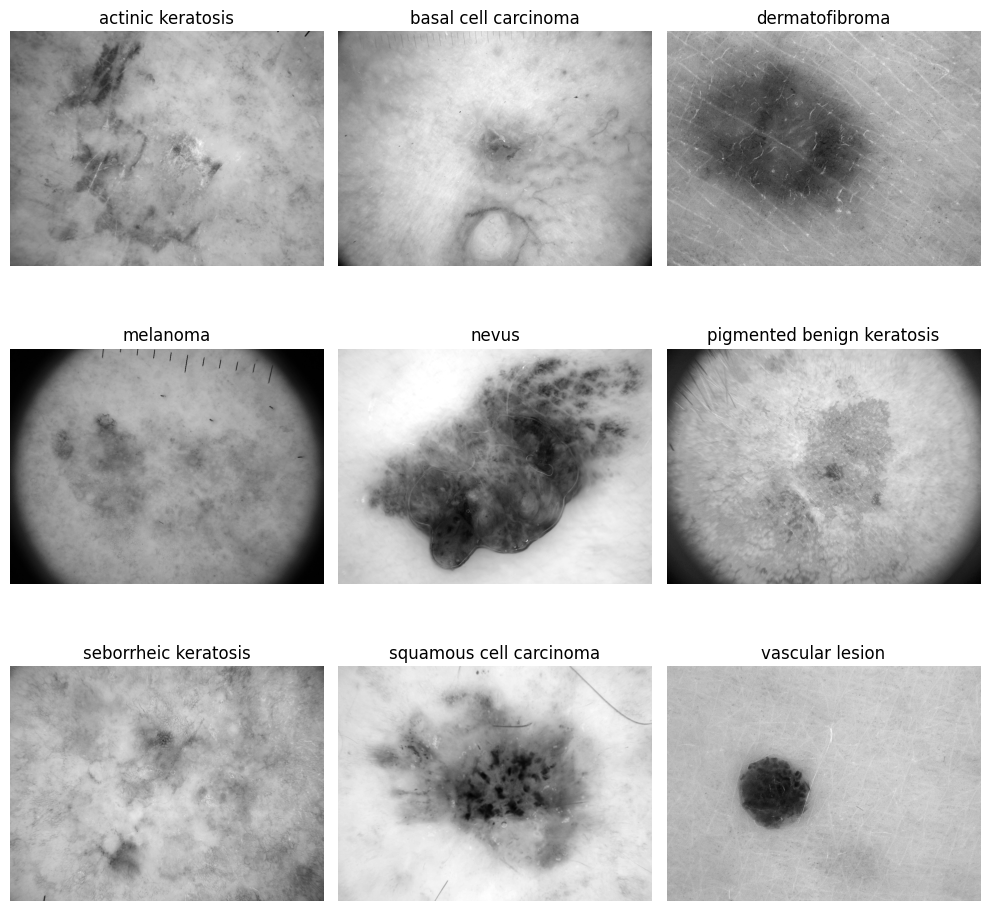

In [16]:
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image

# Convert train_dir to a Path object
train_dir = pathlib.Path(train_dir)

num_classes = len(class_names)
plt.figure(figsize=(10, 10))
for i in range(num_classes):
    plt.subplot(3, 3, i + 1)
    image_path = list(train_dir.glob(class_names[i] + '/*.jpg'))[1]

    # Load image and convert to grayscale
    image = Image.open(str(image_path)).convert('L')  # 'L' mode is for grayscale
    plt.title(class_names[i])
    plt.imshow(image, cmap='gray')  # Ensure grayscale is applied in plot
    plt.axis('off')  # Hide axes for cleaner visualization

plt.tight_layout()
plt.show()


In [17]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 180, 180, 3)
(32,)


**Model 1: ResNET34 Model** (Selected model)


*   Train Loss: 0.0016, Val Loss: 0.0032, Val Accuracy: 0.6197
*   Weighted Precision: 0.5772,
Weighted Recall: 0.5424,
Weighted F1-Score: 0.5205,
Validation accuracy: 0.6197

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data Augmentation
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

import os

# Paths to the dataset directories
train_dir = os.path.join(
    nodoubttome_skin_cancer9_classesisic_path,
    "Skin cancer ISIC The International Skin Imaging Collaboration",
    "Train"
)
test_dir = os.path.join(
    nodoubttome_skin_cancer9_classesisic_path,
    "Skin cancer ISIC The International Skin Imaging Collaboration",
    "Test"
)

# Dataset and Dataloader
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_train)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform_test)

# Validation Split
val_size = int(0.2 * len(train_dataset))
train_size = len(train_dataset) - val_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# Focal Loss for Class Balancing
class FocalLoss(nn.Module):
    def __init__(self, gamma=2, alpha=None):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, inputs, targets):
        CE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        p_t = torch.exp(-CE_loss)
        focal_loss = ((1 - p_t) ** self.gamma) * CE_loss
        if self.alpha is not None:
            focal_loss = self.alpha[targets] * focal_loss
        return focal_loss.mean()

class_counts = [len([y for _, y in train_dataset if y == i]) for i in range(len(train_dataset.dataset.classes))]
class_weights = 1.0 / torch.tensor(class_counts, dtype=torch.float)
criterion = FocalLoss(gamma=2, alpha=class_weights.to(device))

# Pretrained ResNet Model
model = models.resnet34(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(train_dataset.dataset.classes))
model = model.to(device)

# Optimizer and Learning Rate Scheduler
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=0.001, steps_per_epoch=len(train_loader), epochs=20
)

Using device: cuda


Epoch 1/25
Train Loss: 0.0026, Val Loss: 0.0035, Val Accuracy: 0.5391
Epoch 2/25
Train Loss: 0.0026, Val Loss: 0.0037, Val Accuracy: 0.5526
Epoch 3/25
Train Loss: 0.0022, Val Loss: 0.0033, Val Accuracy: 0.5951
Epoch 4/25
Train Loss: 0.0023, Val Loss: 0.0035, Val Accuracy: 0.5727
Epoch 5/25
Train Loss: 0.0023, Val Loss: 0.0035, Val Accuracy: 0.5794
Epoch 6/25
Train Loss: 0.0022, Val Loss: 0.0034, Val Accuracy: 0.5347
Epoch 7/25
Train Loss: 0.0020, Val Loss: 0.0035, Val Accuracy: 0.5369
Epoch 8/25
Train Loss: 0.0020, Val Loss: 0.0030, Val Accuracy: 0.6309
Epoch 9/25
Train Loss: 0.0020, Val Loss: 0.0031, Val Accuracy: 0.5481
Epoch 10/25
Train Loss: 0.0019, Val Loss: 0.0033, Val Accuracy: 0.6085
Epoch 11/25
Train Loss: 0.0018, Val Loss: 0.0035, Val Accuracy: 0.5951
Epoch 12/25
Train Loss: 0.0019, Val Loss: 0.0034, Val Accuracy: 0.5749
Epoch 13/25
Train Loss: 0.0020, Val Loss: 0.0032, Val Accuracy: 0.5928
Epoch 14/25
Train Loss: 0.0018, Val Loss: 0.0037, Val Accuracy: 0.5615
Epoch 15/25
Tra

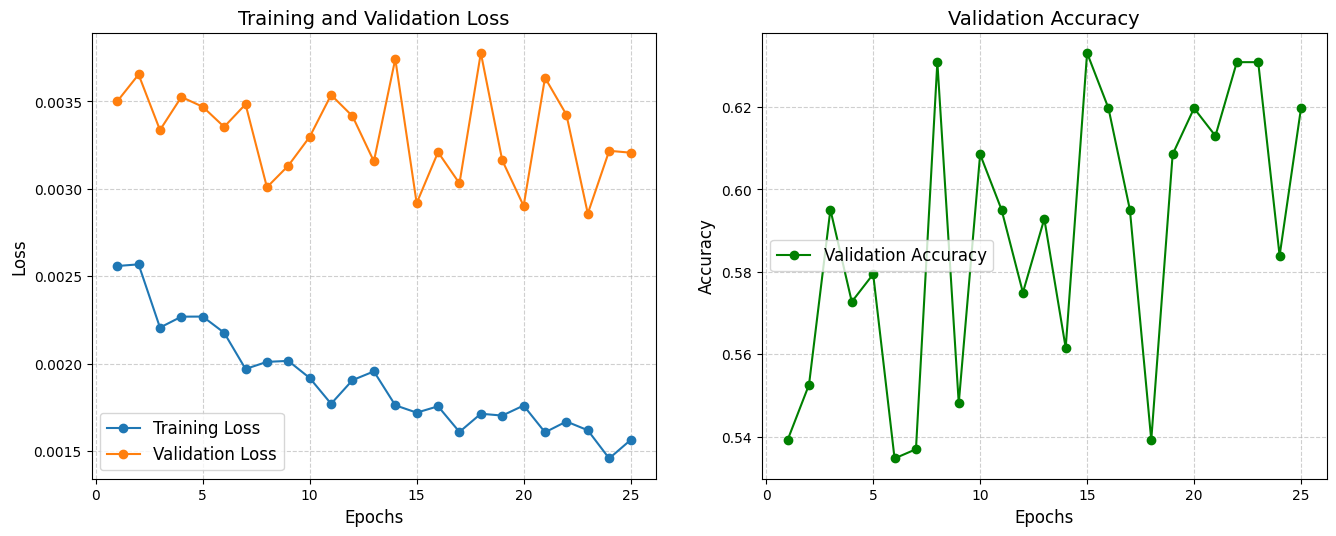

Weighted Precision: 0.5772
Weighted Recall: 0.5424
Weighted F1-Score: 0.5205
Classification Report:
                            precision    recall  f1-score   support

         actinic keratosis       0.88      0.44      0.58        16
      basal cell carcinoma       0.70      1.00      0.82        16
            dermatofibroma       0.88      0.44      0.58        16
                  melanoma       0.08      0.06      0.07        16
                     nevus       0.47      0.94      0.62        16
pigmented benign keratosis       0.75      0.56      0.64        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.43      0.38      0.40        16
           vascular lesion       0.43      1.00      0.60         3

                  accuracy                           0.54       118
                 macro avg       0.51      0.53      0.48       118
              weighted avg       0.58      0.54      0.52       118



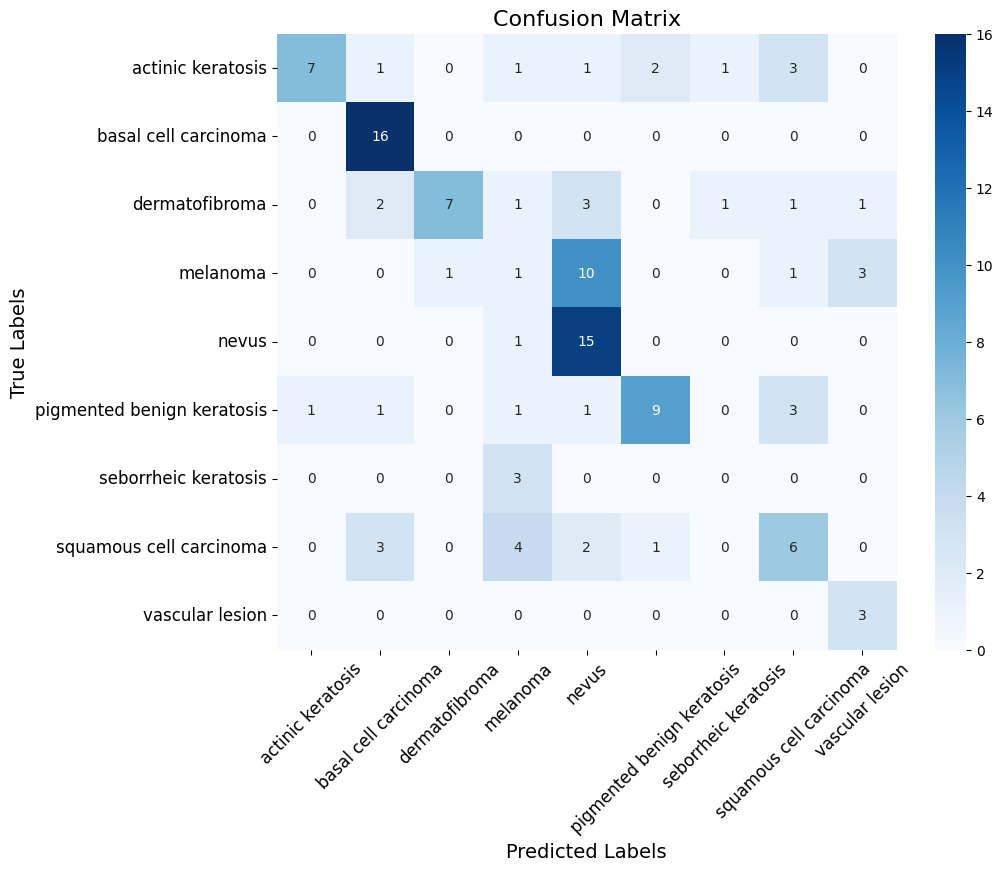

Final Validation Accuracy: 61.97%


In [52]:
# Training and Validation Loop
num_epochs = 25
train_loss_history, val_loss_history, val_accuracy_history = [], [], []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_train_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    train_loss = running_train_loss / len(train_loader)
    train_loss_history.append(train_loss)

    # Validation phase
    model.eval()
    running_val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss = running_val_loss / len(val_loader)
    val_accuracy = correct / total
    val_loss_history.append(val_loss)
    val_accuracy_history.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

#CHART ANALYSIS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

# Plot Training and Validation Loss
plt.figure(figsize=(14, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, label='Training Loss', marker='o')
plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss', marker='o')
plt.title("Training and Validation Loss", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_accuracy_history) + 1), val_accuracy_history, label='Validation Accuracy', color='green', marker='o')
plt.title("Validation Accuracy", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(pad=3.0)
plt.show()

# Evaluate Test Data
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Precision, Recall, F1-Score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1_score:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_dataset.dataset.classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.dataset.classes, yticklabels=train_dataset.dataset.classes)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

# Display Final Validation Accuracy
accuracy = val_accuracy_history[-1]
print(f"Final Validation Accuracy: {accuracy * 100:.2f}%")


Model 2: CNN model (With Augmentor)



*   Epoch 20/20, Train Loss: 1.4902, Val Loss: 1.4225, Val Accuracy: 0.4609



In [31]:
!pip install Augmentor

In [34]:
import os
import Augmentor

# Define input and output directories
path_to_training_dataset = os.path.join(nodoubttome_skin_cancer9_classesisic_path, "Skin cancer ISIC The International Skin Imaging Collaboration", "Train")
output_dir = '/content/augmented_data/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List of class names (subdirectories inside the training directory)
class_names = os.listdir(path_to_training_dataset)

# Create subdirectories for each class inside the output directory
for class_name in class_names:
    class_output_dir = os.path.join(output_dir, class_name)
    if not os.path.exists(class_output_dir):
        os.makedirs(class_output_dir)

# Loop through each class and apply the augmentation pipeline
for class_name in class_names:
    class_input_dir = os.path.join(path_to_training_dataset, class_name)
    class_output_dir = os.path.join(output_dir, class_name)

    # Apply Augmentor pipeline for data augmentation
    p = Augmentor.Pipeline(class_input_dir, output_directory=class_output_dir)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000)  # Adjust the number of augmented images per class


Initialised with 95 image(s) found.
Output directory set to /content/augmented_data/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDACEFC7C40>: 100%|██████████| 1000/1000 [00:37<00:00, 26.64 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/augmented_data/melanoma.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FDAF5743340>: 100%|██████████| 1000/1000 [02:56<00:00,  5.67 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/augmented_data/nevus.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x7FDAF5724370>: 100%|██████████| 1000/1000 [02:34<00:00,  6.48 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/augmented_data/basal cell carcinoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FDAF57733D0>: 100%|██████████| 1000/1000 [00:30<00:00, 32.88 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/augmented_data/vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDC5379E0B0>: 100%|██████████| 1000/1000 [00:30<00:00, 32.42 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/augmented_data/pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDC5362C520>: 100%|██████████| 1000/1000 [00:30<00:00, 32.38 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_data/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDC6005D210>: 100%|██████████| 1000/1000 [00:31<00:00, 31.97 Samples/s]


Initialised with 114 image(s) found.
Output directory set to /content/augmented_data/actinic keratosis.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FDAF5742C50>: 100%|██████████| 1000/1000 [00:31<00:00, 31.69 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/augmented_data/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FDB344A34F0>: 100%|██████████| 1000/1000 [01:15<00:00, 13.29 Samples/s]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import Augmentor

In [35]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Path to dataset
train_dir = os.path.join(nodoubttome_skin_cancer9_classesisic_path, "Skin cancer ISIC The International Skin Imaging Collaboration", "Train")
test_dir = os.path.join(nodoubttome_skin_cancer9_classesisic_path, "Skin cancer ISIC The International Skin Imaging Collaboration", "Test")

# Data Augmentation for class balancing using Augmentor
# Augment each class with rotation and other transformations
class_names = os.listdir(train_dir)
for class_name in class_names:
    p = Augmentor.Pipeline(os.path.join(train_dir, class_name), output_directory=f'/kaggle/working/data/{class_name}/output/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000)

# Data augmentation and transformations
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

Using device: cuda
Initialised with 95 image(s) found.
Output directory set to /kaggle/working/data/dermatofibroma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDB344A34F0>: 100%|██████████| 1000/1000 [00:31<00:00, 32.25 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /kaggle/working/data/melanoma/output/.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FDACEF64DF0>: 100%|██████████| 1000/1000 [02:51<00:00,  5.84 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /kaggle/working/data/nevus/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7FDACEF49660>: 100%|██████████| 1000/1000 [02:26<00:00,  6.84 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /kaggle/working/data/basal cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDB344B9A50>: 100%|██████████| 1000/1000 [00:30<00:00, 32.97 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /kaggle/working/data/vascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDC5335D570>: 100%|██████████| 1000/1000 [00:30<00:00, 32.43 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /kaggle/working/data/pigmented benign keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDAF5726F20>: 100%|██████████| 1000/1000 [00:33<00:00, 30.12 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /kaggle/working/data/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDC52DA2140>: 100%|██████████| 1000/1000 [00:30<00:00, 32.95 Samples/s]


Initialised with 114 image(s) found.
Output directory set to /kaggle/working/data/actinic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDB344B9A50>: 100%|██████████| 1000/1000 [00:30<00:00, 32.67 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /kaggle/working/data/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FDC52DA2BF0>: 100%|██████████| 1000/1000 [01:12<00:00, 13.70 Samples/s]


In [36]:
# Datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_train)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform_test)

# Validation split
val_size = int(0.2 * len(train_dataset))
train_size = len(train_dataset) - val_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [37]:
# Class weights for imbalanced data
class_counts = [len([y for _, y in train_dataset if y == i]) for i in range(len(train_dataset.dataset.classes))]
class_weights = 1.0 / torch.tensor(class_counts, dtype=torch.float)
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

In [40]:
# Improved CNN Model Architecture
class MelanomaModel(nn.Module):
    def __init__(self, num_classes):
        super(MelanomaModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(512 * 7 * 7, 1024)
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = self.pool(nn.ReLU()(self.conv3(x)))
        x = self.pool(nn.ReLU()(self.conv4(x)))
        x = self.pool(nn.ReLU()(self.conv5(x)))
        x = x.view(-1, 512 * 7 * 7)  # Flatten
        x = self.dropout(nn.ReLU()(self.fc1(x)))
        x = self.fc2(x)
        return x

# Initialize the model
model = MelanomaModel(num_classes=len(train_dataset.dataset.classes))
model = model.to(device)

# Optimizer and scheduler
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)

In [41]:
# Simplified Training and Validation Loop
num_epochs = 20
train_loss_history, val_loss_history, val_accuracy_history = [], [], []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_train_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    train_loss = running_train_loss / len(train_loader)
    train_loss_history.append(train_loss)

    # Validation Phase
    model.eval()
    running_val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss = running_val_loss / len(val_loader)
    val_accuracy = correct / total
    val_loss_history.append(val_loss)
    val_accuracy_history.append(val_accuracy)

    scheduler.step(val_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Test Evaluation
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

Epoch 1/20
Train Loss: 2.1819, Val Loss: 2.1380, Val Accuracy: 0.2103
Epoch 2/20
Train Loss: 1.9716, Val Loss: 1.8753, Val Accuracy: 0.2774
Epoch 3/20
Train Loss: 1.9044, Val Loss: 1.8492, Val Accuracy: 0.2327
Epoch 4/20
Train Loss: 1.8344, Val Loss: 1.8388, Val Accuracy: 0.2483
Epoch 5/20
Train Loss: 1.8197, Val Loss: 1.8238, Val Accuracy: 0.1499
Epoch 6/20
Train Loss: 1.8153, Val Loss: 1.7937, Val Accuracy: 0.2081
Epoch 7/20
Train Loss: 1.7830, Val Loss: 1.7824, Val Accuracy: 0.4049
Epoch 8/20
Train Loss: 1.7342, Val Loss: 1.8235, Val Accuracy: 0.2528
Epoch 9/20
Train Loss: 1.7040, Val Loss: 1.6471, Val Accuracy: 0.2394
Epoch 10/20
Train Loss: 1.7015, Val Loss: 1.7226, Val Accuracy: 0.3110
Epoch 11/20
Train Loss: 1.7085, Val Loss: 1.5551, Val Accuracy: 0.2237
Epoch 12/20
Train Loss: 1.6549, Val Loss: 1.7875, Val Accuracy: 0.2394
Epoch 13/20
Train Loss: 1.6675, Val Loss: 1.5832, Val Accuracy: 0.3177
Epoch 14/20
Train Loss: 1.6094, Val Loss: 1.5811, Val Accuracy: 0.2371
Epoch 15/20
Tra

Classification Report:
                            precision    recall  f1-score   support

         actinic keratosis       0.35      0.38      0.36        16
      basal cell carcinoma       0.27      0.44      0.33        16
            dermatofibroma       0.25      0.06      0.10        16
                  melanoma       0.07      0.06      0.07        16
                     nevus       0.46      0.69      0.55        16
pigmented benign keratosis       0.25      0.12      0.17        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.29      0.25      0.27        16
           vascular lesion       0.27      1.00      0.43         3

                  accuracy                           0.30       118
                 macro avg       0.25      0.33      0.25       118
              weighted avg       0.27      0.30      0.26       118



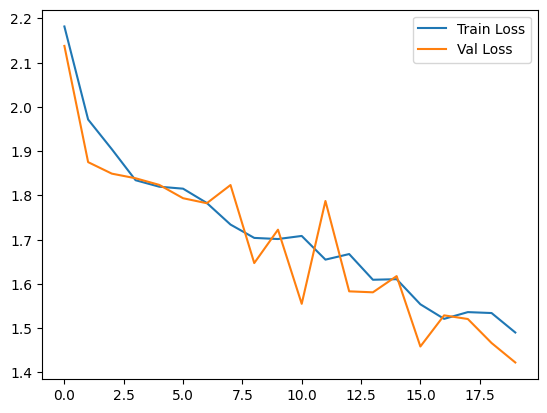

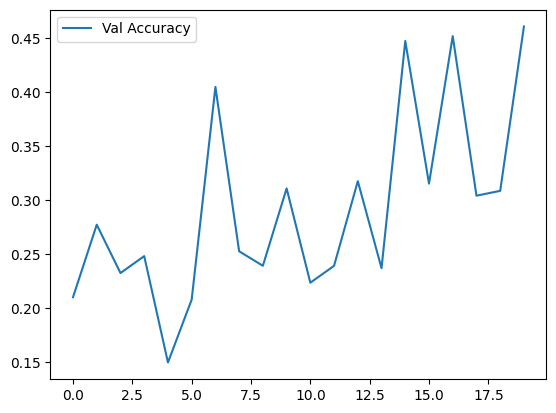

In [42]:
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_dataset.dataset.classes))

# Optionally, you can also plot the training/validation loss and accuracy
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.legend()
plt.show()

plt.plot(val_accuracy_history, label='Val Accuracy')
plt.legend()
plt.show()

Model 3: ResNet18 model (without loss function weights)



*   Train Loss: 1.1928, Val Loss: 1.2444, Val Accuracy: 0.4474
*  melanoma: precision:0.33, recall:0.06  f1-score:0.11


In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from sklearn.metrics import classification_report

# Model: ResNet18 with transfer learning
model = models.resnet18(pretrained=True)
# Modify the last layer for the number of classes
model.fc = nn.Linear(model.fc.in_features, len(train_dataset.dataset.classes))
model = model.to(device)

# Optimizer and scheduler
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)


In [44]:
# Training and validation loop
num_epochs = 20
train_loss_history, val_loss_history, val_accuracy_history = [], [], []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_train_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    train_loss = running_train_loss / len(train_loader)
    train_loss_history.append(train_loss)

    # Validation phase
    model.eval()
    running_val_loss, correct, total = 0.0, 0, 0
    y_true, y_pred = [], []  # For storing true and predicted labels
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    val_loss = running_val_loss / len(val_loader)
    val_accuracy = correct / total
    val_loss_history.append(val_loss)
    val_accuracy_history.append(val_accuracy)

    scheduler.step(val_loss)

    # Display per epoch metrics
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Test Evaluation (Precision, Recall, F1-score)
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Classification Report
print("Classification Report (Test Set):")
print(classification_report(y_true, y_pred, target_names=train_dataset.dataset.classes))


Epoch 1/20
Train Loss: 1.9831, Val Loss: 2.0947, Val Accuracy: 0.2707
Epoch 2/20
Train Loss: 1.7695, Val Loss: 1.8629, Val Accuracy: 0.2998
Epoch 3/20
Train Loss: 1.6248, Val Loss: 1.8423, Val Accuracy: 0.2864
Epoch 4/20
Train Loss: 1.6221, Val Loss: 1.7098, Val Accuracy: 0.2864
Epoch 5/20
Train Loss: 1.5286, Val Loss: 1.5761, Val Accuracy: 0.2998
Epoch 6/20
Train Loss: 1.5620, Val Loss: 1.4433, Val Accuracy: 0.3423
Epoch 7/20
Train Loss: 1.4748, Val Loss: 2.7525, Val Accuracy: 0.2595
Epoch 8/20
Train Loss: 1.4850, Val Loss: 1.3768, Val Accuracy: 0.4385
Epoch 9/20
Train Loss: 1.4086, Val Loss: 1.3743, Val Accuracy: 0.4631
Epoch 10/20
Train Loss: 1.4262, Val Loss: 1.3695, Val Accuracy: 0.3937
Epoch 11/20
Train Loss: 1.3648, Val Loss: 1.4057, Val Accuracy: 0.4855
Epoch 12/20
Train Loss: 1.3658, Val Loss: 1.3567, Val Accuracy: 0.4877
Epoch 13/20
Train Loss: 1.3185, Val Loss: 1.9593, Val Accuracy: 0.3333
Epoch 14/20
Train Loss: 1.3690, Val Loss: 1.3431, Val Accuracy: 0.4251
Epoch 15/20
Tra

Model 4: Using ResNet 18 pretrained model



*  Epoch 25/25, Train Loss: 0.8119, Val Loss: 0.9240, Val Accuracy: 0.6622

Precision: 0.4950, Recall: 0.4746, F1-Score: 0.4526






In [55]:
# Model setup: ResNet18 with Transfer Learning
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(train_dataset.dataset.classes))
model = model.to(device)

# Optimizer and scheduler setup
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)

# CrossEntropyLoss (no weight specified for simplicity here, modify if needed)
criterion = nn.CrossEntropyLoss()

Epoch 1/25
Train Loss: 1.7642, Val Loss: 1.8366, Val Accuracy: 0.4049
Epoch 2/25
Train Loss: 1.4795, Val Loss: 1.9202, Val Accuracy: 0.3535
Epoch 3/25
Train Loss: 1.4196, Val Loss: 1.5483, Val Accuracy: 0.4385
Epoch 4/25
Train Loss: 1.3383, Val Loss: 2.0984, Val Accuracy: 0.3378
Epoch 5/25
Train Loss: 1.3941, Val Loss: 1.5493, Val Accuracy: 0.4094
Epoch 6/25
Train Loss: 1.2886, Val Loss: 1.5529, Val Accuracy: 0.4586
Epoch 7/25
Train Loss: 1.2514, Val Loss: 1.4276, Val Accuracy: 0.5034
Epoch 8/25
Train Loss: 1.2764, Val Loss: 1.2003, Val Accuracy: 0.5570
Epoch 9/25
Train Loss: 1.2516, Val Loss: 1.2609, Val Accuracy: 0.5459
Epoch 10/25
Train Loss: 1.1708, Val Loss: 1.7837, Val Accuracy: 0.4989
Epoch 11/25
Train Loss: 1.1666, Val Loss: 1.3470, Val Accuracy: 0.4944
Epoch 12/25
Train Loss: 1.1496, Val Loss: 1.3285, Val Accuracy: 0.5347
Epoch 13/25
Train Loss: 1.0420, Val Loss: 1.1724, Val Accuracy: 0.6107
Epoch 14/25
Train Loss: 1.0342, Val Loss: 1.0892, Val Accuracy: 0.6018
Epoch 15/25
Tra

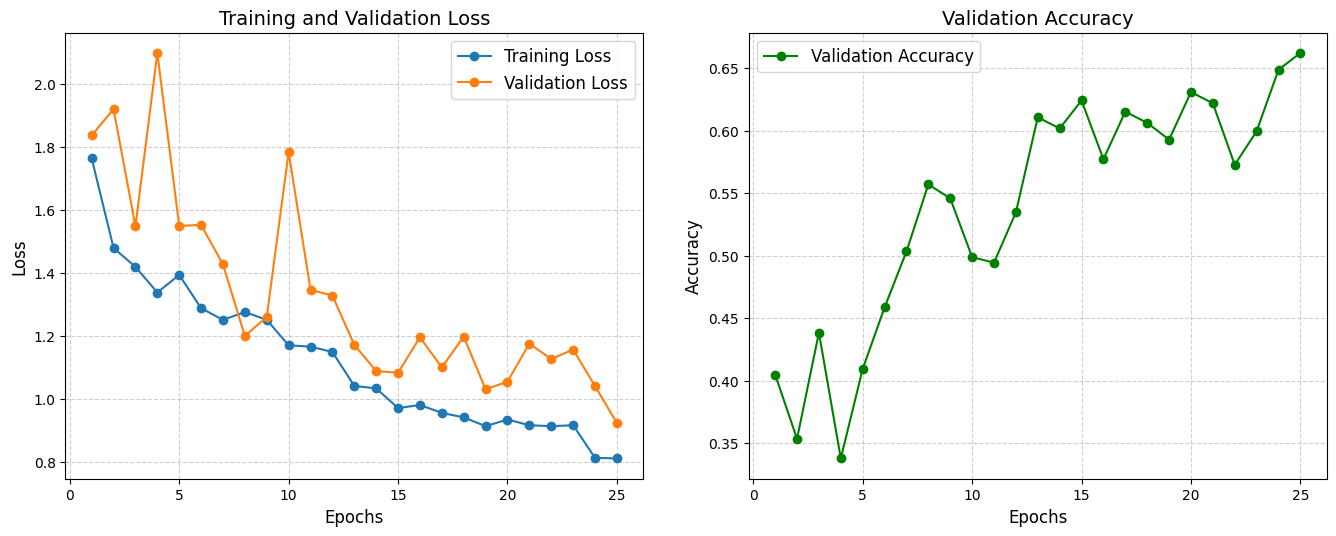

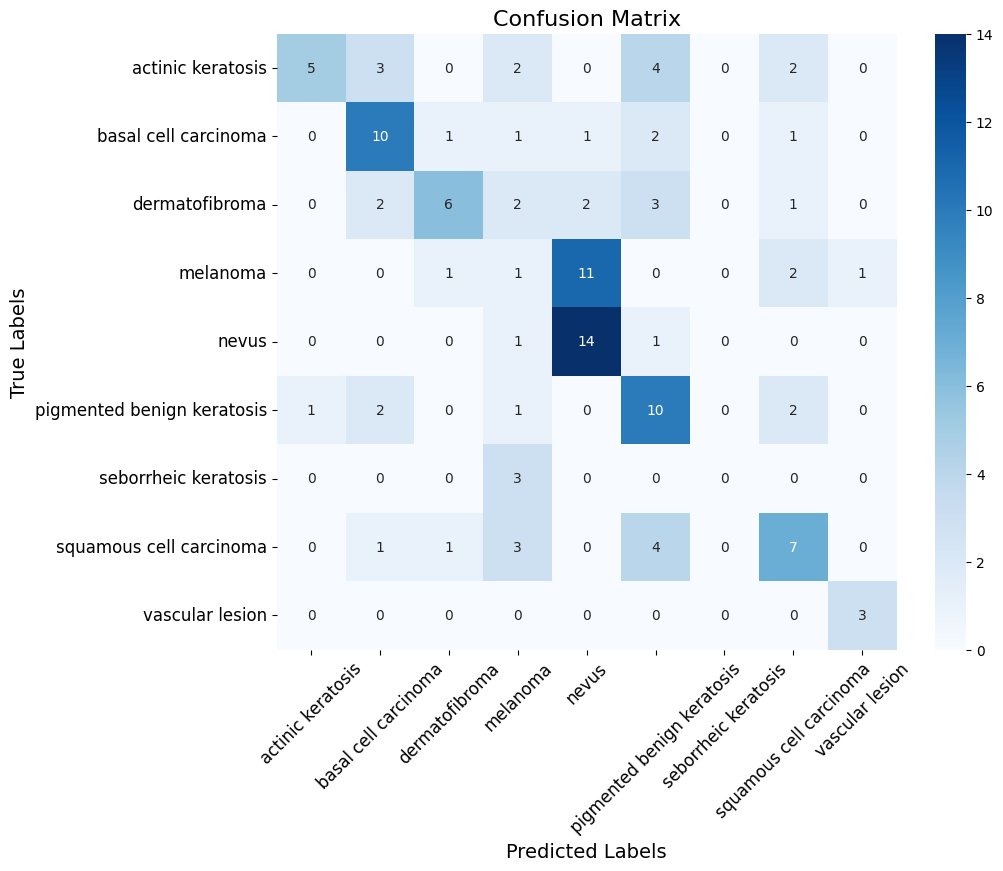

In [56]:
# Early Stopping Setup
best_val_accuracy = 0.0
patience_counter = 0
early_stopping_patience = 5

# Training and Validation loop
num_epochs = 25
train_loss_history, val_loss_history, val_accuracy_history = [], [], []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_train_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    train_loss = running_train_loss / len(train_loader)
    train_loss_history.append(train_loss)

    # Validation phase
    model.eval()
    running_val_loss, correct, total = 0.0, 0, 0
    y_true, y_pred = [], []  # Store true and predicted labels for metrics
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    val_loss = running_val_loss / len(val_loader)
    val_accuracy = correct / total
    val_loss_history.append(val_loss)
    val_accuracy_history.append(val_accuracy)

    scheduler.step(val_loss)

    # Early Stopping Check
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    # Display per epoch metrics
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Test Evaluation (Precision, Recall, F1-score for Melanoma Class)
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Import necessary metrics and plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix

# Evaluate Precision, Recall, F1-score for all classes (use weighted average)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print("Precision, Recall, F1-score (Weighted Average):")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

# Display Classification Report
print("Classification Report (Test Set):")
print(classification_report(y_true, y_pred, target_names=train_dataset.dataset.classes))

# Plot Training and Validation Loss and Accuracy
plt.figure(figsize=(14, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, label='Training Loss', marker='o')
plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss', marker='o')
plt.title("Training and Validation Loss", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_accuracy_history) + 1), val_accuracy_history, label='Validation Accuracy', color='green', marker='o')
plt.title("Validation Accuracy", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(pad=3.0)
plt.show()

# Compute and Plot Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.dataset.classes, yticklabels=train_dataset.dataset.classes)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()
